## MACS30150 PS4
### Dr. Richard Evans
#### Submitted by Junho Choi

### Problem 1

#### Problem 1-(a)

In the below few code chunks, I import the data from *incomes.txt* and first try to provide a few rows of the dataset. Also, it is available to us that the minimum and maximum of the dataset are approximately 49278.80 and 135865.03 dollars, respectively.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as sts
import pandas as pd

In [2]:
### Loading in the data
y_dat = np.loadtxt('incomes.txt')
print(y_dat[0:5]) ## checking a few elements
print("Minimum is", '%.2f' % y_dat.min())
print("Maximum is", '%.2f' % y_dat.max())

[  51253.49715631  100630.32024137   83009.27613739   82882.10654304
   77338.29483892]
Minimum is 49278.80
Maximum is 135865.03


In the below code chunk, I plot of the histogram of annual incomes of MACSS graduates of 2018, 2019, and 2020 as requested.

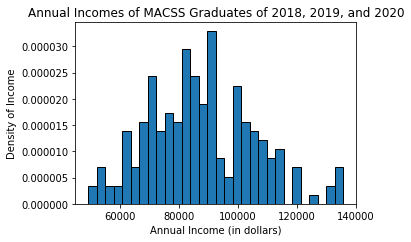

In [3]:
num_bins = 30
count, bins, ignored = plt.hist(y_dat, 
                                num_bins, normed=True,
                                edgecolor='k')
plt.title('Annual Incomes of MACSS Graduates of 2018, 2019, and 2020', fontsize=12)
plt.xlabel(r'Annual Income (in dollars)')
plt.ylabel(r'Density of Income')
plt.subplots_adjust(bottom=.25, left=.25)
plt.show()

#### Problem 1-(b)

Firstly, I prepare function *lognormalpdf* for returning the PDF density value given some point *x* on the distribution, *mu* and *sig* where we assume that $x \sim LN(\mu=mu, \sigma=sig)$.

In [4]:
def lognormalpdf(x, mu, sig):
    
    err_msg = "standard dev. must be positive"
    assert sig > 0, err_msg
    
    err_msg2 = "input must be positive"
    if type(x) == np.array or type(x) == np.ndarray:
        assert x.all() >= 0, err_msg2
    elif type(x) == int or type(x) == float:
        assert x >= 0, err_msg2
    
    fricpart = 1 / (x * sig * ((2 * np.pi)**0.5))
    expopart = (-1) * ((np.log(x)-mu)**2) / (2*(sig**2))
    var = fricpart * (np.e ** expopart)

    return var

In the below code chunk, I first create a vector of equally-spaced *x* values for PDF graph construction -- this vector is called *onebyone* below. Notice that I plot from $0.1$ to $150000.1$ as $0.0$ is actually not included in the support of log-normal distributions. I then plug this vector into the *lognormalpdf* function that I have created above with $mu = 11.0$ and $sig = 0.5$. This yields the vector of densities for log-normal distributions for the aforementioned *x* values.

In [5]:
onebyone = np.linspace(0.1, 150000.1, 1500000)
log_byone = lognormalpdf(onebyone, 11.0, 0.5)

Below is the resulting PDF distribution.

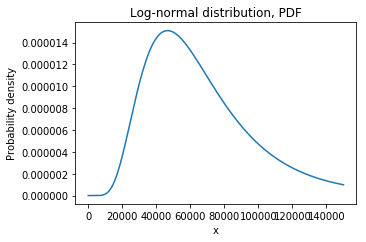

In [6]:
plt.plot(onebyone,log_byone)
plt.title("Log-normal distribution, PDF")
plt.ylabel(r'Probability density')
plt.xlabel(r'x')
plt.subplots_adjust(bottom=.25, left=.25)
plt.show()

Notice that the above distribution, when plotted together with the histogram, seems to be a bad fit for representing the data. Therefore, I try out another log-normal distribution with $mu=11.35$ and $sig=0.2$ -- this certainly seems to be a better representation than before.

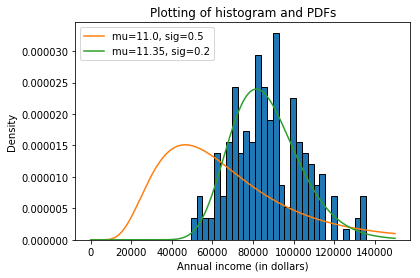

In [13]:
## histogram
num_bins = 30
count, bins, ignored = plt.hist(y_dat, 
                                num_bins, normed=True,
                                edgecolor='k')

log_byone = lognormalpdf(onebyone, 11.0, 0.5)
plt.plot(onebyone, log_byone, label='mu=11.0, sig=0.5')

log_byone2 = lognormalpdf(onebyone, 11.35, 0.2)
plt.plot(onebyone, log_byone2, label='mu=11.35, sig=0.2')
plt.title("Plotting of histogram and PDFs")
plt.ylabel(r'Density')
plt.xlabel(r'Annual income (in dollars)')
plt.legend()
plt.show()

In the below code chunk, I define the function *loglike_calc* that takes in function *fn*, x values (in numpy vector format)*xvals*, mean variable *mu*, and standard deviation variable *sig*.

In [14]:
def loglike_calc(fn, xvals, mu, sig):
    
    msg = "please let the input be in numpy array format"
    assert type(xvals) == np.ndarray or type(xvals) == np.array, msg
    
    likeli_vec = fn(xvals, mu, sig)
    loglike_vec = np.log(likeli_vec)
    loglike = np.sum(loglike_vec)
        
    return loglike

Given $\mu=11.0$ and $\sigma=0.5$, the log likelihood is found to be approximately $-2385.857$. On the other hand, that with $\mu=11.35$ and $\sigma=0.5$ is found to be approximately $-2242.253$, which certainly seems to perform better than the given set of parameters.

In [15]:
initial_one = loglike_calc(lognormalpdf, y_dat, 11.0, 0.5)
better_one = loglike_calc(lognormalpdf, y_dat, 11.35, 0.2)

print("With mu=11.00 and sigma=0.5, the log likelihood is", '%.3f' % initial_one)
print("With mu=11.35 and sigma=0.2, the log likelihood is", '%.3f' % better_one)

With mu=11.00 and sigma=0.5, the log likelihood is -2385.857
With mu=11.35 and sigma=0.2, the log likelihood is -2242.253


#### Problem 1-(c)

In the below code chunk, I have created the function *crit_lognormal* for returning the negative of log likelihood given some parameters as well as x values. This will serve as the criterion function for determining the values of $\mu$ and $\sigma$ that maximize log likelihood (i.e. that are maximum-likelihood estimates).

In [19]:
def crit_lognormal(params, xvals):
    
    mu, sigma = params
    loglikeli = loglike_calc(lognormalpdf, xvals, mu, sigma)
    negloglikeli = -loglikeli
    
    return negloglikeli

Yet since I have not put in the x values that I will be using for this exercise, I have defined a lambda function *crit_lognormal_with_x* in the code chunk below that puts in the provided income data. The maximum-likelihood estimates for $\mu$ and $\sigma$ are found to be $\mu_{MLE} \approx 11.359$ and $\sigma_{MLE} \approx 0.208$.

In [20]:
import scipy.optimize as opt

crit_lognormal_with_x = lambda params: crit_lognormal(params, y_dat)

mu_init = 11.35  # mu_2
sig_init = 0.2  # sig_2
params_init = np.array([mu_init, sig_init])
mle_args = y_dat
results_uncstr = opt.minimize(crit_lognormal_with_x, params_init)
mu_MLE, sig_MLE = results_uncstr.x
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)

mu_MLE= 11.3590230068  sig_MLE= 0.20817732092


We can certainly check below that log likelihood for MLE approach certainly is higher than the two previous ones that we had examined.

In [21]:
initial_one = loglike_calc(lognormalpdf, y_dat, 11.0, 0.5)
better_one = loglike_calc(lognormalpdf, y_dat, 11.35, 0.2)
MLE_one = loglike_calc(lognormalpdf, y_dat, mu_MLE, sig_MLE)

print("With mu=11.00 and sigma=0.5, the log likelihood is", '%.3f' % initial_one)
print("With mu=11.35 and sigma=0.2, the log likelihood is", '%.3f' % better_one)
print("MLE log likelihood is", '%.3f' % MLE_one)

With mu=11.00 and sigma=0.5, the log likelihood is -2385.857
With mu=11.35 and sigma=0.2, the log likelihood is -2242.253
MLE log likelihood is -2241.719


Just in case, let us show the well-behavedness of the maximum-likelihood estimation for this problem as well. The most ideal shape of the 3-dimensional graph would be that of a paraboloid, but it seems that -- at least in the neighborhood of the maximum likelihood estimates that we had found -- the optimization depends a lot on finding the right value of $\sigma$ and not so much with that for $\mu$.

Text(0.5,0,'log likelihood')

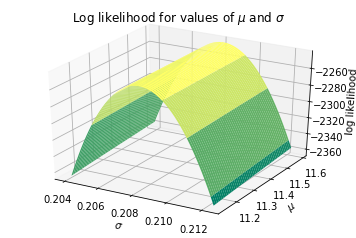

In [22]:
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')

# mu_vals = np.linspace(300, 635, 50)
# sig_vals = np.linspace(30, 210, 50)
mu_vals = np.linspace(0.98*mu_MLE, 1.02*mu_MLE, 50)
sig_vals = np.linspace(0.98*sig_MLE, 1.02*sig_MLE, 50)
lnlik_vals = np.zeros((50, 50))
for mu_ind in range(50):
    for sig_ind in range(50):
        lnlik_vals[mu_ind, sig_ind] = \
            loglike_calc(lognormalpdf, y_dat,
                         mu_vals[mu_ind], sig_vals[sig_ind])

mu_mesh, sig_mesh = np.meshgrid(mu_vals, sig_vals)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(sig_mesh, mu_mesh, lnlik_vals, rstride=8,
                cstride=1, cmap=cmap1)
ax.set_title(r'Log likelihood for values of $\mu$ and $\sigma$')
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\mu$')
ax.set_zlabel(r'log likelihood')

The variance-covariance matrix is also presented below.

In [23]:
vcv_mle = results_uncstr.hess_inv
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('Variance-Covariance Matrix of MLE:')
print(vcv_mle)
print()
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)

Variance-Covariance Matrix of MLE:
[[  7.31778409e-04   3.43486900e-05]
 [  3.43486900e-05   1.70453877e-05]]

Standard error for mu estimate =  0.0270514030802
Standard error for sigma estimate =  0.00412860602646


#### Problem 1-(d)

The $p$-value for this likelihood ratio test yields $0$, which means that we can reject the null hypothesis that the income data came from a log-normal distribution with $\mu=11.0$ and $\sigma=0.5$.

In [24]:
mu_in_b, sig_in_b = 11.0, 0.5
log_lik_h0 = loglike_calc(lognormalpdf, y_dat, mu_in_b, sig_in_b)
print('hypothesis value log likelihood:', log_lik_h0)
print()
log_lik_mle = loglike_calc(lognormalpdf, y_dat, mu_MLE, sig_MLE)
print('MLE log likelihood:', log_lik_mle)
print()
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value:', LR_val)
print()
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value:', pval_h0)

hypothesis value log likelihood: -2385.85699781

MLE log likelihood: -2241.71930136

likelihood ratio value: 288.275392902

chi squared of H0 with 2 degrees of freedom p-value: 0.0


#### Problem 1-(e)

In the below code chunks, I have presented two ways -- numerical integration via the trapezoid method and directly calculating the CDF of log-normal distribution -- of calculating the percentages for earning more than 100,000 dollars and less than 75,000 dollars. The percentages are found to be approximately 22.99% for the former, and 26.02% for the latter.

In [25]:
from scipy.special import erf

def lognormalcdf(x, mu, sig):
    err_msg = "standard dev. must be positive"
    assert sig > 0, err_msg
        
    err_msg = "input must be positive"
    if type(x) == np.array or type(x) == np.ndarray:
        assert x.all() > 0, err_msg2
    elif type(x) == int or type(x) == float:
        assert x > 0, err_msg2
    
    inerf = (np.log(x) - mu) / (sig * (2 ** 0.5))
    rtnval = 0.5 + 0.5 * erf(inerf)
    
    return rtnval

In [26]:
poor = lognormalcdf(75000, mu_MLE, sig_MLE)
rich = 1 - lognormalcdf(100000, mu_MLE, sig_MLE)

In [27]:
print("Probability of earning less than $75000 is", "%.2f" % (100*poor) + "%")
print("Probability of earning more than $100000 is", "%.2f" % (100*rich) + "%")

Probability of earning less than $75000 is 26.02%
Probability of earning more than $100000 is 22.99%


In [28]:
MLE_lognorm = lambda x: lognormalpdf(x, mu_MLE, sig_MLE)

In [29]:
def trapintegr(func, a, b, N):
    bin_cuts = np.linspace(a, b, N + 1)
    binsize = (b-a)/N
    
    bin_fvals = func(bin_cuts)
    bin_vals = (bin_fvals[1:] + bin_fvals[0:N]) / 2 * binsize
    
    return bin_vals.sum()

In [30]:
poor2 = trapintegr(MLE_lognorm, 0.1, 75000, 75000)
rich2 = 1 - trapintegr(MLE_lognorm, 0.1, 100000, 75000)

In [31]:
print("Probability of earning less than $75000 is", "%.2f" % (100*poor2) + "%")
print("Probability of earning more than $100000 is", "%.2f" % (100*rich2) + "%")

Probability of earning less than $75000 is 26.02%
Probability of earning more than $100000 is 22.99%


### Problem 2

#### Problem 2-(a)

To start, let us load the data and check out how the data is structured.

In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression as lin

In [33]:
### Loading in the data
sick_dat = pd.read_csv('sick.txt')
sick_dat[0:5] ## checking a few rows

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


To provide ourselves with a starting point for finding the maximum-likelihood estimates, let us use OLS to find the estimates for parameters.

In [34]:
### trying the OLS first; first prepping the y and X
y_vals = sick_dat['sick']
x_mat = sick_dat[['age', 'children', 'avgtemp_winter']]

y_vals = np.array(y_vals)
x_mat = np.array(x_mat)

It seems that the OLS regression estimates are as follows: $\beta_0 \approx 0.252, \beta_1 \approx 0.013, \beta_2 \approx 0.400$, and $\beta_3 \approx -0.010$.

In [35]:
reg = lin().fit(x_mat, y_vals)
base_coef = reg.coef_
base_intercept = reg.intercept_
print("Regression coefficients:", reg.coef_)
print("Regression intercept:", base_intercept)

Regression coefficients: [ 0.01293366  0.40049939 -0.00999174]
Regression intercept: 0.251641374723


Let us now use the below function *eps_creation* to find a vector (numpy array) of error terms (epsilons) and find the standard deviation for it. It seems that the error terms have a standard deviation of approximately $0.003$.

In [36]:
def eps_creation(y, x1, x2, x3, b0, b1, b2, b3):
    
    epsilons = y - b0 - b1*x1 - b2*x2 - b3*x3
    
    return epsilons

In [37]:
epsilons = eps_creation(y_vals, x_mat[:, 0], x_mat[:, 1], x_mat[:, 2],
                        base_intercept, base_coef[0], base_coef[1], base_coef[2])

print("Standard deviation of the error terms is",'%.5f' % epsilons.std())

Standard deviation of the error terms is 0.00302


Now, let us use the below function *normalpdf* to draw the normal distribution which will be presented along with the histogram for the error terms.

In [38]:
def normalpdf(x, mu, sig):
    
    sig = abs(sig)
    
    fracpart = 1 / ((2 * np.pi * (sig ** 2)) ** 0.5)
    expopart = (-1) * ((x - mu)**2)/(2*(sig**2))
    var = fracpart * (np.e ** expopart)

    return var

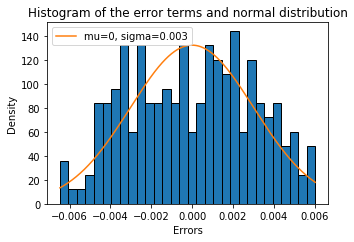

In [40]:
## histogram
num_bins = 30
count, bins, ignored = plt.hist(epsilons, 
                                num_bins, normed=True,
                                edgecolor='k')

## normal distribution
lb, ub= np.min(epsilons), np.max(epsilons)
xspace = np.linspace(lb, ub, 1001)
norm_byone = normalpdf(xspace, 0, epsilons.std())
plt.plot(xspace, norm_byone, label='mu=0, sigma=0.003')
plt.title("Histogram of the error terms and normal distribution")
plt.ylabel(r'Density')
plt.xlabel(r'Errors')
plt.subplots_adjust(bottom=.25, left=.25)
plt.legend()
plt.show()

To create the log-likelihood for the normal distribution (as the error terms are assumed to be normally distributed), I use the function *ll_normal*. I admit that this function would not be suitable for those trying to use more or less than 3 regressors; in the future, I will fix this. But for now, this would be sufficient.

In [41]:
def ll_normal(y, x1, x2, x3, b0, b1, b2, b3, sigma):
    
    epsilons = eps_creation(y, x1, x2, x3, b0, b1, b2, b3)
    normal_densities = normalpdf(epsilons, 0, sigma)
    ln_densities = np.log(normal_densities)
    log_ll = np.sum(ln_densities)
    
    return log_ll

I also provide the criterion function that returns the negative of the log likelihood given the parameters and arguments.

In [42]:
def crit_normal(params, *args):

    b0, b1, b2, b3, sigma = params
    y, x1, x2, x3 = args
    
    return -ll_normal(y, x1, x2, x3, b0, b1, b2, b3, sigma)

I use the initialization $(0.2, 0.01, 0.4, -0.01, 0.05)$ which are close to the OLS parameters. The below process, for some reason, has produced programming errors; however, the estimated (using MLE approach) coefficients are exactly the same as that of the OLS, which are $\beta_0 \approx 0.252, \beta_1 \approx 0.013, \beta_2 \approx 0.400$, and $\beta_3 \approx -0.010$. The value of the log likelihood is approximately $876.87$.

In [43]:
## base_coef and base_intercept from OLS estimation
arguments = (y_vals, x_mat[:, 0], x_mat[:, 1], x_mat[:, 2])
params_init2 = (0.2, 0.01, 0.4, -0.01, 0.05)

results_uncstr2 = opt.minimize(crit_normal, params_init2, arguments)
print(results_uncstr2.x)
print(-results_uncstr2.fun)

[ 0.25164623  0.01293336  0.40050207 -0.00999168  0.00301767]
876.8650464975143


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


Below code presents the variance-covariance matrix. I admit that the printed version of the code output is quite hard to interpret, and therefore provide the cleaner, Latex version directly below.

\begin{bmatrix}
6.84\times10^{-7} &  8.08\times10^{-9} & -1.51\times10^{-7} & -1.65\times10^{-8} & 1.84\times 10^{-9} \\
8.08\times10^{-9} & 3.96\times10^{-9} & -3.52\times10^{-8} & -2.50\times10^{-9} & -1.37\times 10^{-10} \\
-1.51\times10^{-7} & -3.52\times10^{-8} & 3.58\times10^{-7} & 2.24\times10^{-8} & -6.99\times 10^{-11} \\
-1.65\times10^{-8} & -2.50\times10^{-9} & 2.24\times10^{-8} & 1.84\times10^{-9} & 9.79\times 10^{-11} \\
1.84\times10^{-9} & -1.37\times10^{-10} & -6.99\times10^{-11} & 9.79\times10^{-11} & 2.20\times 10^{-8}
\end{bmatrix}

In [44]:
vcv_mle2 = results_uncstr2.hess_inv
print('Variance-Covariance Matrix of MLE:')
print(vcv_mle2)

Variance-Covariance Matrix of MLE:
[[  6.83931654e-07   8.08438267e-09  -1.50571088e-07  -1.65440760e-08
    1.84103852e-09]
 [  8.08438267e-09   3.95820755e-09  -3.52328259e-08  -2.49904455e-09
   -1.36777360e-10]
 [ -1.50571088e-07  -3.52328259e-08   3.58034576e-07   2.23578038e-08
   -6.98637598e-11]
 [ -1.65440760e-08  -2.49904455e-09   2.23578038e-08   1.83866092e-09
    9.79430515e-11]
 [  1.84103852e-09  -1.36777360e-10  -6.98637598e-11   9.79430515e-11
    2.19890756e-08]]


#### Problem 2-(b)

Below presents the results of the likelihood ratio test; because the $p$-value is 0.0, we can reject the null hypothesis that the regressors have no effect on number of sick days. Moreover, such a likelihood is, once again, 0%.

In [46]:
hyp_b0, hyp_b1, hyp_b2, hyp_b3, hyp_sigma = 1, 0, 0, 0, 0.1
mle_b0, mle_b1, mle_b2, mle_b3, mle_sigma = results_uncstr2.x

log_lik_h0 = ll_normal(y_vals, x_mat[:, 0], x_mat[:, 1], x_mat[:, 2],
                       hyp_b0, hyp_b1, hyp_b2, hyp_b3, hyp_sigma)
print('hypothesis value log likelihood:', log_lik_h0)
print()
log_lik_mle = ll_normal(y_vals, x_mat[:, 0], x_mat[:, 1], x_mat[:, 2],
                        mle_b0, mle_b1, mle_b2, mle_b3, mle_sigma)
print('MLE log likelihood:', log_lik_mle)
print()
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value:', LR_val)
print()
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 5)
print('chi squared of H0 with 5 degrees of freedom p-value:', pval_h0)

hypothesis value log likelihood: -2253.70068804

MLE log likelihood: 876.865046498

likelihood ratio value: 6261.13146908

chi squared of H0 with 5 degrees of freedom p-value: 0.0
